In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
data_bensin = pd.read_csv("bensin.csv")

#Melihat 5 data teratas
data_bensin.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [3]:
#Mengetahui jumlah kolom dan baris dari dataset
data_bensin.shape

(65, 2)

Dataset mempunyai 2 kolom dan 65 baris 

In [4]:
#Mengetahui informasi dataset (kolom dan tipe data)
data_bensin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
#Mengetahui deskripsi statistik (mean, median, max, min, dsb)
data_bensin.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


## Missing Values

In [6]:
#Mengecek keberadaan missing values
data_bensin.isnull().sum()

Liter        0
Kilometer    0
dtype: int64

## Visualisasi

<AxesSubplot:xlabel='Liter', ylabel='Count'>

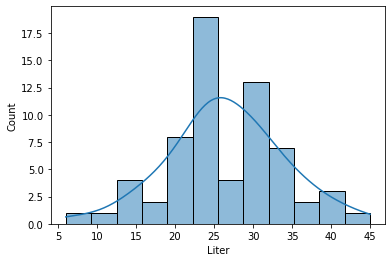

In [7]:
sns.histplot(data=data_bensin, x="Liter", kde=True)

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

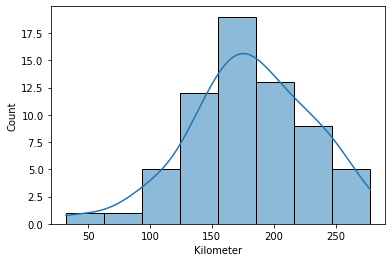

In [8]:
sns.histplot(data=data_bensin, x="Kilometer", kde=True)

<AxesSubplot:xlabel='Liter', ylabel='Kilometer'>

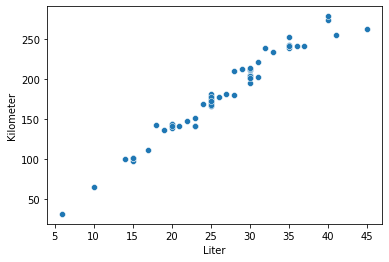

In [9]:
sns.scatterplot(data=data_bensin, x="Liter", y="Kilometer")

## Modeling

In [10]:
#Variabel X dan Y
X = data_bensin['Liter'].values.reshape(-1,1)
Y = data_bensin['Kilometer'].values.reshape(-1,1)

Variabel X merupakan variabel independen yang digunakan untuk memprediksi variabel Y. Variabel Y merupakan variabel dependen atau target yang ingin diprediksi. Variabel Y berperan sebagai output atau hasil yang ingin diprediksi. Dalam kasus ini yaitu memprediksi berapa kilometer yang dapat ditempuh jika mengisi sejumlah bensin. Jumlah bensin (kolom Liter) berperan sebagai independent variabel atau prediktor dan waktu tempuh (kolom Kilometer) berperan sebagai dependent variabel atau target. 

In [27]:
#Split dataset (training dan test dataset) dengan komposisi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
#Variabel Model Regresi
regresi = LinearRegression()

#Train model menggunakan training dataset
regresi.fit(X_train, y_train)

LinearRegression()

In [29]:
#Nilai slope/koefisien dan intersep 
print(regresi.coef_)
print(regresi.intercept_)

[[6.45829591]]
[10.64122249]


Y = 10.64 + 6.45X

In [84]:
#Akurasi model menggunakan test dataset 
regresi.score(X_test, y_test)

0.9798523775622333

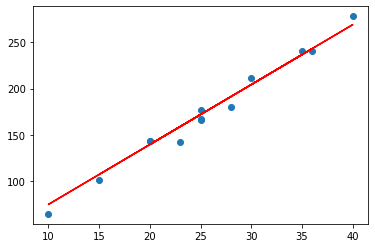

In [85]:
#Visualisasi data aktual vs prediksi menggunakan data testing

y_prediksi = regresi.predict(X_test) #Variabel prediksi

plt.scatter(X_test, y_test)
plt.plot(X_test, y_prediksi, c='r')
plt.show()


In [86]:
#Mengukur kinerja model dengan metriks evaluasi MSE, MAE, RMSE, dan R-Squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_prediksi)
mse = mean_squared_error(y_test,y_prediksi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_prediksi)

print(f"Nilai MAE: {mae:.4f}\nNilai MSE: {mse:.4f}\nNilai RMSE: {rmse:.4f}\nNilai R-Squared: {r2:.4f}")

Nilai MAE: 6.9827
Nilai MSE: 63.8613
Nilai RMSE: 7.9913
Nilai R-Squared: 0.9799


Model regresi memiliki kinerja yang baik dalam memprediksi nilai yang akurat. MAE, MSE, dan RMSE menunjukkan tingkat kesalahan yang relatif rendah, sementara R-Squared menunjukkan kemampuan model yang tinggi dalam menjelaskan variasi variabel dependen.

In [87]:
#Melihat perbedaan nilai aktual dengan prediksi
data_test= pd.DataFrame(y_test, columns=['Nilai Aktual'])
data_prediksi = pd.DataFrame(y_prediksi, columns=['Prediksi'])

#Menggabungkan nilai prediksi dengan nilai aktual
gabung = pd.concat([data_test,data_prediksi],axis=1)
gabung

,Nilai Aktual,Prediksi
0,102.0,107.515661
1,167.0,172.098620
2,177.0,172.098620
3,142.0,159.182028
4,144.0,139.807141
5,278.0,268.973059
6,211.0,204.390100
7,241.0,236.681579
8,65.0,75.224182
9,241.0,243.139875


In [88]:
#Membuat kolom selisih antara nilai prediksi dengan nilai aktual
gabung['Selisih'] = gabung['Prediksi'] - gabung['Nilai Aktual']
gabung

,Nilai Aktual,Prediksi,Selisih
0,102.0,107.515661,5.515661
1,167.0,172.098620,5.098620
2,177.0,172.098620,-4.901380
3,142.0,159.182028,17.182028
4,144.0,139.807141,-4.192859
5,278.0,268.973059,-9.026941
6,211.0,204.390100,-6.609900
7,241.0,236.681579,-4.318421
8,65.0,75.224182,10.224182
9,241.0,243.139875,2.139875


Nilai selisih antara nilai prediksi dengan nilai aktual dengan hasil negatif merepresentasikan prediksi yang lebih rendah dari nilai aktual. Hasil positif menunjukkan prediksi yang lebih tinggi dari nilai aktual.

In [89]:
#Melakukan prediksi
prediksi = regresi.predict([[60]])
prediksi

array([[398.13897723]])

Dengan 60 liter bensin dapat menempuh 398,13 kilometer

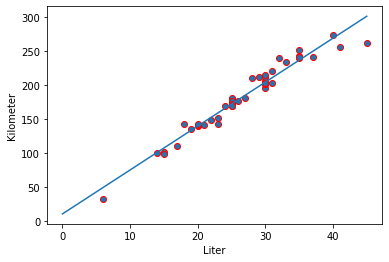

In [92]:
plt.scatter(X_train,y_train, edgecolors='r')
plt.xlabel("Liter")
plt.ylabel("Kilometer")
x1 = np.linspace(0,45)
y1 = 10.64 + 6.45*x1
plt.plot(x1,y1)
plt.show()